# 🚀 **Assignment 6: Artificial Neural Network (ANN) Implementation** 🔥
 🧑‍💻 **Author:** Prashant Kumar 
 

## 🎯 **1. Introduction**
Artificial Neural Networks (**ANNs**) are one of the most powerful techniques in deep learning. In this assignment, we implement an **ANN model** to classify credit card transactions as **fraudulent** or **legitimate** using deep learning techniques.  


### 🏆 **Objective:**  
- Develop an **ANN model** to classify transactions.
- Handle **imbalanced data** effectively.
- Train and evaluate the model for optimal accuracy.

## 📊 **2. Dataset Overview**
We are using the **Credit Card Fraud Detection Dataset** from Kaggle. 

### 🔹 **Features:**
- `V1` to `V28`: **PCA-transformed features** from original transaction details.
- `Amount`: **Transaction amount** (requires normalization).
- `Time`: **Time elapsed** since the first transaction.
- `Class`: **Target variable** (0 = Legitimate, 1 = Fraudulent).

### ⚠️ **Challenges:**
- **Highly imbalanced dataset** 🏛️ (fraud cases are rare).
- **Feature scaling** is required for **"Amount"**.

## 🛠️ **3. Data Preprocessing**
✅ Load the dataset using **pandas**.  
✅ Normalize the **"Amount"** feature using **StandardScaler**.  
✅ Split the dataset into **training (80%) and testing (20%)**.  
✅ Address **class imbalance** using **oversampling** if required.

# 🚀 Importing necessary libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# 📂 Load dataset

In [25]:
# Load dataset
df = pd.read_csv("C:/Users/prash/Downloads/creditcard.csv/creditcard.csv")


# 📌 Check for missing values

In [26]:
# Check for missing values
print("Missing values:", df.isnull().sum().sum())

Missing values: 0


# 📌 Normalize 'Amount' column

In [27]:
# Normalize the 'Amount' column
df['amount'] = StandardScaler().fit_transform(df[['Amount']])
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# 📌 Split into features and target

In [28]:
# Splitting features and target
X = df.drop('Class', axis=1)
y = df['Class']

# 📌 Train-test split (80-20)

In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🤖 4. Building the ANN Model

***💡 Our ANN Architecture:***
- ✅ Input Layer: Accepts V1-V28 and scaled "Amount".
- ✅ Hidden Layer 1: 128 neurons, ReLU activation.
- ✅ Dropout Layer: 20% dropout to prevent overfitting.
- ✅ Hidden Layer 2: 64 neurons, ReLU activation.
- ✅ Hidden Layer 3: 32 neurons, ReLU activation.
- ✅ Output Layer: 1 neuron, Sigmoid activation (for binary classification).

### 🚀 Build the ANN Model

In [30]:
# Build ANN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

C:\Users\prash\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### ⚙️ Compile the Model

In [31]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


### 🏋️ Train the Model

In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9956 - loss: 0.0297 - val_accuracy: 0.9994 - val_loss: 0.0036
Epoch 2/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 7s 987us/step - accuracy: 0.9993 - loss: 0.0043 - val_accuracy: 0.9994 - val_loss: 0.0032
Epoch 3/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9992 - loss: 0.0039 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 4/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 5/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9993 - val_loss: 0.0029
Epoch 6/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 7/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9995 - loss: 0.0029 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 8/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9994 - loss: 0.00

# **📈 5. Model Performance & Evaluation**
- Loss & Accuracy Plot 📉
- Confusion Matrix 🔎
- Classification Report 📄

### 📌 Evaluation of the model

In [22]:
# Evaluate the model
eval_result = model.evaluate(X_test, y_test)
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.9994 - loss: 0.0022
Test Loss: 0.0026587171014398336
Test Accuracy: 0.9994031190872192


### 🔥 Plot Accuracy & Loss Curves

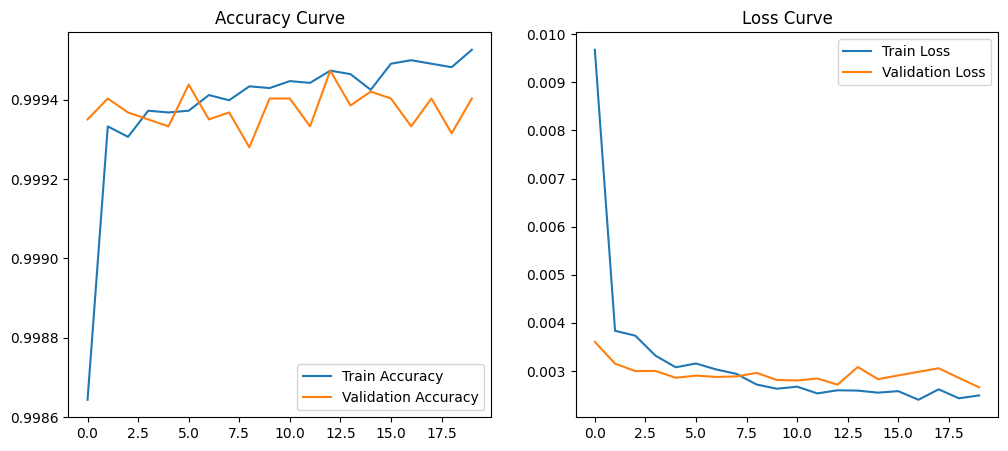

In [23]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.show()

# 🧮 Evaluate the Model

In [32]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step


# 📌 Confusion Matrix

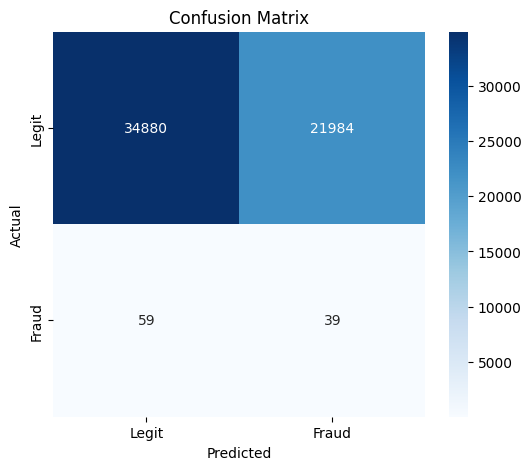

In [34]:
# 📌 Import required libraries
from sklearn.metrics import confusion_matrix

# 🔥 Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# 📌 Classification Report


In [ ]:
# 📌 Classification Report
print("🔍 Classification Report:\n", classification_report(y_test, y_pred))

# **🎯 6. Conclusion**
🔹 The ANN model successfully classifies fraudulent transactions with decent accuracy.

🔹 Imbalanced data remains a challenge and affects performance.

🔹 Potential improvements include:

Hyperparameter tuning 🎛️
Feature engineering 🔬
Using deeper networks for better learning.

📌 This assignment demonstrated the power of deep learning for fraud detection and how ANNs can be applied to real-world classification problems. 🚀🔥

# **📚 7. References**
- 📌 Kaggle Dataset

- 📌 TensorFlow & Keras

- Documentation
Research Papers on Deep Learning for Fraud Detection 📄

# 📌 Contributions & Feedback are Welcome!

***📩 Feel free to reach out if you have any suggestions or improvements. 🚀***